In [1]:
import numpy as np

In [2]:
# from sklearn.datasets import fetch_openml

# mnist = fetch_openml('mnist_784', version=1)

# mnist.keys()

import joblib

mnist = joblib.load('./mnist')

In [3]:
def split_mnist_train_test_data(mnist, n_train = 60000):
    X, y = mnist['data'], mnist['target']
    # Convert y to number because most of ML algorithms prefer number input
    y = y.astype(np.uint8)
    return X[:n_train], X[n_train:], y[:n_train], y[n_train:]

In [4]:
X_train, X_test, y_train, y_test = split_mnist_train_test_data(mnist)

In [6]:
import matplotlib.pyplot as plt

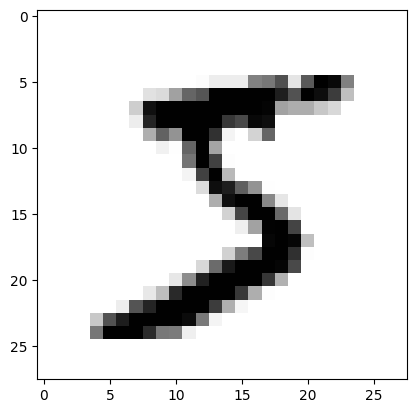

In [7]:
some_digit = X_train.loc[0].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')

In [8]:
# True for all 5s and false for all other digits
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([some_digit])

/home/zq/miniconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.loc[train_index]
    y_train_folds = y_train_5.loc[train_index]
    X_test_fold = X_train.loc[test_index]
    y_test_fold = y_train_5.loc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  

0.9669
0.91625
0.96785


In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [13]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [14]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [16]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [17]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train_5, y_scores)

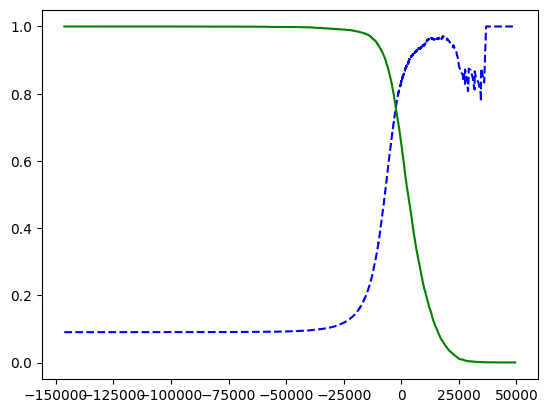

In [18]:
def plot_precision_recall_vs_threshold(precisions, recalls, threshold):
    plt.plot(threshold, precisions[:-1], 'b--', label='Precision')
    plt.plot(threshold, recalls[:-1], 'g-', label='Recall')
    
plot_precision_recall_vs_threshold(precisions, recalls, threshold)
plt.show()

In [20]:
threshold_90_precision = threshold[np.argmax(precisions >= 0.9)]

In [21]:
threshold_90_precision

3370.019499143958

In [22]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [23]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [24]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

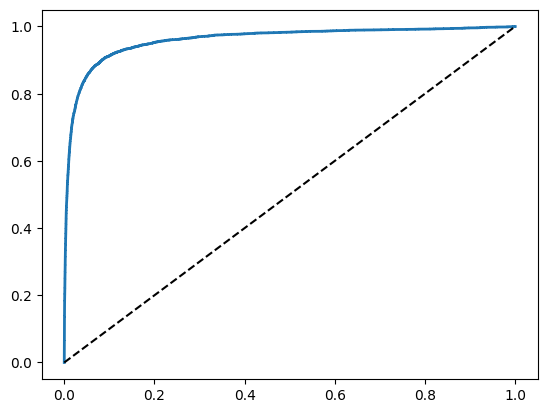

In [35]:
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1],[0,1], 'k--')

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [38]:
# predict_proba method will return a pair of positive, negative probability
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [40]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [39]:
# Take the positive class's probability as the score
y_score_forest = y_probas_forest[:, 1]

In [42]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_score_forest)

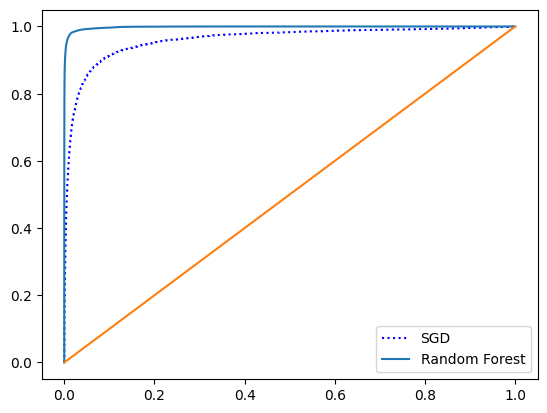

In [45]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plt.plot(fpr_forest, tpr_forest, label='Random Forest')
plt.plot([0,1], [0,1])
plt.legend(loc='lower right')

In [9]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

svm_clf.predict([some_digit])

/home/zq/miniconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [10]:
some_digit_scores = svm_clf.decision_function([some_digit])

/home/zq/miniconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


some_digit_scores

In [12]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(rf_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.9663, 0.9639, 0.9656])

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(rf_clf, X_train, y_train,cv=3 )

In [17]:
from sklearn.metrics import confusion_matrix
conf_mx= confusion_matrix(y_train, y_train_pred)

In [19]:
conf_mx

array([[5847,    1,    7,    1,    5,    9,   17,    1,   33,    2],
       [   1, 6636,   35,   20,   12,    3,    5,   13,   10,    7],
       [  30,   14, 5744,   31,   36,    3,   16,   37,   39,    8],
       [  10,    7,   94, 5804,    4,   68,    7,   44,   65,   28],
       [   8,   12,   12,    2, 5656,    0,   28,    9,   16,   99],
       [  25,   11,    9,   67,    9, 5190,   44,    6,   33,   27],
       [  25,   10,    4,    0,   13,   38, 5810,    0,   18,    0],
       [   6,   25,   71,    6,   36,    1,    0, 6035,   11,   74],
       [   9,   34,   34,   46,   25,   50,   26,    6, 5546,   75],
       [  22,    9,   17,   73,   74,   20,    3,   51,   50, 5630]])

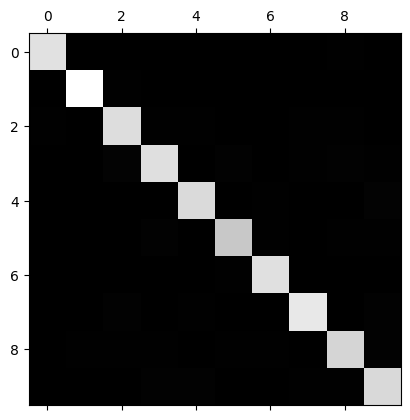

In [20]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [23]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

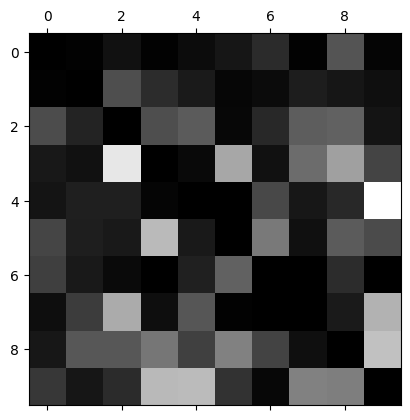

In [25]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [39]:
import matplotlib
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [np.array(instances.iloc[i]).reshape(size, size) for i in range(instances.shape[0])]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

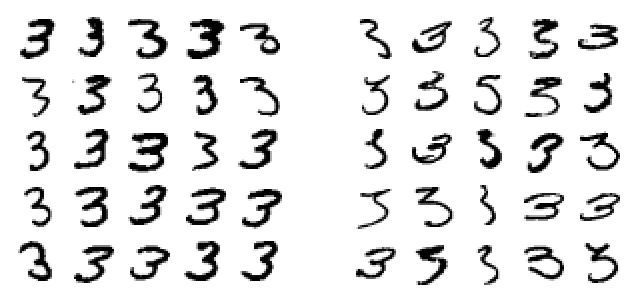

In [41]:
cl_a, cl_b = 3, 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))

plt.subplot(221); plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row = 5)

# Multilabel Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [12]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [13]:
knn_clf.predict([some_digit])

/home/zq/miniconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

In [21]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

In [28]:
X_train_mod.iloc[0].values.reshape(28,28)

array([[ 54.,  21.,  90.,  98.,  78.,  52.,  48.,  41.,   1.,  34.,  73.,
         88.,   9.,  99.,  73.,   6.,  89.,  30.,  11.,  86.,  74.,  77.,
         83.,  74.,  52.,  45.,  57.,  90.],
       [ 58.,  65.,  92.,  52.,  80.,  46.,  69.,  76.,  15.,  21.,   5.,
         56.,  80.,  37.,  54.,  80.,  56.,  84.,  50.,   3.,  63.,  52.,
         48.,   6.,   8.,  66.,  80.,  28.],
       [ 91.,  31.,   2.,  41.,  18.,  97.,  54.,  43.,   3.,  69.,  37.,
         61.,  54.,  56.,  58.,  45.,  95.,   0.,  83.,  88.,  66.,  19.,
         40.,  99.,  14.,  72.,  65.,  87.],
       [ 39.,  66.,  11.,  24.,  96.,  72.,  75.,  78.,  46.,  21.,  44.,
         53.,  66.,  88.,  83.,  86.,   6.,  31.,  87.,  31.,  38.,  70.,
         40.,  93.,  79.,  85.,  40.,  20.],
       [ 57.,   6.,  66.,  43.,  12.,  50.,  61.,  67.,  22.,  95.,  21.,
          9.,  26.,  67.,  56.,   8.,   8.,  58.,   4.,  12.,  95.,  70.,
         49.,  17.,  18.,  39.,  55.,  22.],
       [  1.,  91.,  24.,  32.,  80

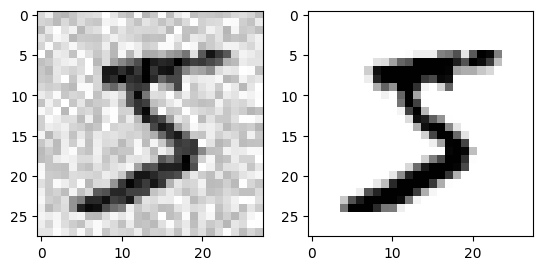

In [40]:
fig, axs = plt.subplots(ncols=2)

axs[0].imshow(X_train_mod.iloc[0].values.reshape(28,28), cmap='binary')
axs[1].imshow(X_train.iloc[0].values.reshape(28,28), cmap='binary')

In [41]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [52]:
clean_digit = knn_clf.predict([X_test.iloc[0]])

/home/zq/miniconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


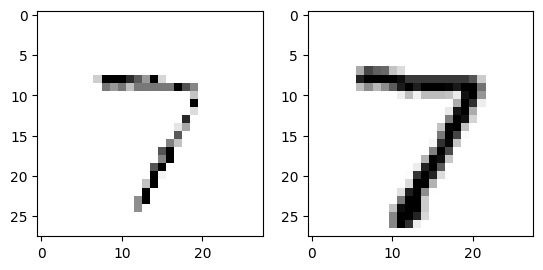

In [53]:
fig, axs = plt.subplots(ncols=2)

axs[0].imshow(clean_digit[0].reshape(28,28), cmap="binary")
axs[1].imshow(X_test.iloc[0].values.reshape(28,28), cmap='binary')
